# 导入必要的库

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 实验要求1：加载糖尿病数据集diabetes，观察数据
# 1. 载入糖尿病情数据库diabetes，查看数据。
# 2. 切分数据，组合成DataFrame数据，并输出数据集前几行，观察数据。

In [2]:
# 加载糖尿病数据集
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

# 输出数据集前几行，观察数据
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  


# 实验要求2：基于线性回归对数据集进行分析
# 3. 查看数据集信息，从数据集中抽取训练集和测试集。
# 4. 建立线性回归模型，训练数据，评估模型。


In [3]:
# 查看数据集信息
print(diabetes_df.info())

# 抽取训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# 建立线性回归模型
linear_model = LinearRegression()

# 训练数据
linear_model.fit(X_train, y_train)

# 评估模型
y_pred = linear_model.predict(X_test)
print(f'模型系数: {linear_model.coef_}')
print(f'均方误差 (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'决定系数 (R^2): {r2_score(y_test, y_pred)}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
模型系数: [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
均方误差 (MSE): 3424.3166882137334
决定系数 (R^2): 0.33222203269065154


# 实验要求3：考察每个特征值与结果之间的关联性，观察得出最相关的特征
# 5. 考察每个特征值与结果之间的关系，分别以散点图展示。

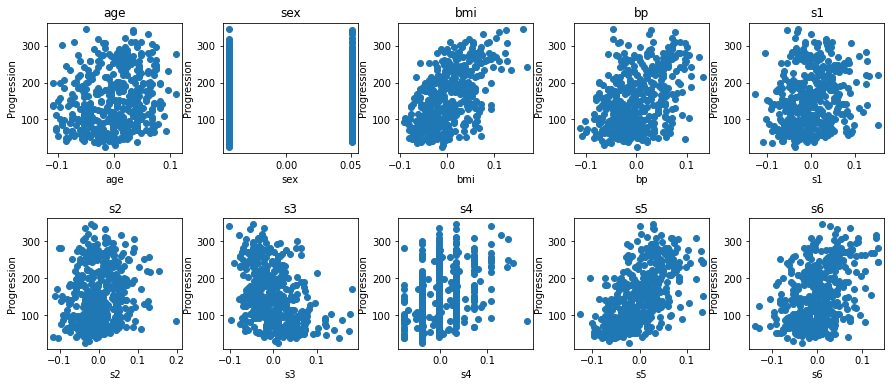

In [4]:
# 考察每个特征值与结果之间的关系，分别以散点图展示
features = diabetes['feature_names']
target = diabetes['target']

# 绘制每个特征与结果的散点图
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.3)
axs = axs.ravel()

for index, feature in enumerate(features):
    axs[index].scatter(diabetes.data[:, index], target)
    axs[index].set_title(feature)
    axs[index].set_xlabel(feature)
    axs[index].set_ylabel('Progression')

plt.show()

# 实验要求4：使用回归分析找出XX特征值与糖尿病的关联性，并预测出相关结果
# 6.把5中相关性最高的特征值提取，然后进行数据切分。
# 8.创建线性回归模型，进行线性回归模型训练。
# 9.对测试集进行预测，求出权重系数。
# 10.对预测结果进行评价，结果可视化。

In [5]:
# 为了以编程方式识别最相关的特征，计算每个特征相对于目标的相关系数。
# 计算相关矩阵
correlation_matrix = diabetes_df.corr()

# 找出所有特征与目标变量的相关性
feature_correlation = correlation_matrix["target"].drop("target")  

# 识别与目标变量相关性最高的特征
most_correlated_feature = feature_correlation.abs().idxmax()
correlation_value = feature_correlation[most_correlated_feature]

print(f"最相关的特征是 '{most_correlated_feature}' 相关系数为 {correlation_value}.")

# 返回最相关的特征的名称及其相关值。
most_correlated_feature, correlation_value


最相关的特征是 'bmi' 相关系数为 0.586450134474689.


('bmi', 0.586450134474689)

BMI 模型系数 (权重): 981.6554361411006
BMI 截距: 152.28824927379625
BMI 均方误差 (MSE): 4150.680189329983
BMI 决定系数 (R^2): 0.19057346847560164


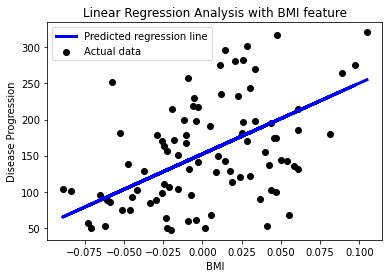

In [6]:
# 提取 bmi 特征
X_bmi = diabetes_df[['bmi']].values
y = diabetes_df['target'].values

# 仅使用“bmi”功能执行另一个训练测试分割
X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi, y, test_size=0.2, random_state=0)

# 仅使用“bmi”特征创建新的线性回归模型
bmi_linear_model = LinearRegression()

# 训练模型
bmi_linear_model.fit(X_bmi_train, y_bmi_train)

# 在测试集上预测
y_bmi_pred = bmi_linear_model.predict(X_bmi_test)

# 计算权重系数并评估预测结果
bmi_model_coefficient = bmi_linear_model.coef_[0]
bmi_model_intercept = bmi_linear_model.intercept_
bmi_mse = mean_squared_error(y_bmi_test, y_bmi_pred)
bmi_r2 = r2_score(y_bmi_test, y_bmi_pred)

# 输出结果
print(f"BMI 模型系数 (权重): {bmi_model_coefficient}")
print(f"BMI 截距: {bmi_model_intercept}")
print(f"BMI 均方误差 (MSE): {bmi_mse}")
print(f"BMI 决定系数 (R^2): {bmi_r2}")

# 可视化结果
plt.scatter(X_bmi_test, y_bmi_test, color='black', label='Actual data')
plt.plot(X_bmi_test, y_bmi_pred, color='blue', linewidth=3, label='Predicted regression line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression Analysis with BMI feature')
plt.legend()
plt.show()
